In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Wedding Rehearsal,1932
1,"Anna, sestra Jany",1976
2,Lee Sangui nalgae,1968
3,Wimbledon: Official Film 2000,2000
4,Hard to Get,2014


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


## Indexing

In [7]:
cast_title_index=cast.set_index('title').sort_index()
cast_title_index.head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Parry Shen,actor,Murder Victim,NaN
#1 Serial Killer,2013,Zachary (X) Brown,actor,Africian American Teen,18.0
#1 Serial Killer,2013,Eric (II) St. John,actor,Officer Williams,NaN
#1 Serial Killer,2013,Jinxia Ma,actress,Chinese Teacher,24.0
#1 Serial Killer,2013,Gemma Massot,actress,Betty Goodman,7.0


In [8]:
%%time
# vanilla

cast[cast.title=='Steve Jobs'].head()

CPU times: user 341 ms, sys: 5.23 ms, total: 347 ms
Wall time: 350 ms


,title,year,name,type,character,n
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
10153,Steve Jobs,2015,Derek W. Adam,actor,Cameraman,NaN
28233,Steve Jobs,2015,Alister Albert,actor,Man with Folder,NaN
47811,Steve Jobs,2015,Steven (IV) Alvarez,actor,Launch Attendee,NaN
49411,Steve Jobs,2015,Chris (III) Amato,actor,Steve Capps,NaN


In [12]:
%%time
#magic
cast_title_index.loc['Steve Jobs'].head()

CPU times: user 522 µs, sys: 97 µs, total: 619 µs
Wall time: 543 µs


,year,name,type,character,n
title,,,,,
Steve Jobs,2015,Holly (II) Horn,actress,Press Photographer,NaN
Steve Jobs,2015,Alex Bretow,actor,Flint Sound Engineer,NaN
Steve Jobs,2015,Dylan Freitas-D'Louhy,actor,Straggler,24.0
Steve Jobs,2015,Cynthia Naylor Smyth,actress,1998 VIP Launch Attendee,NaN
Steve Jobs,2015,John Edward Cabrera,actor,Launch Attendee,NaN


In [32]:
cast_year_index=cast.set_index('year').sort_index()
cast_year_index.head()

,title,name,type,character,n
year,,,,,
1894,Miss Jerry,Blanche Bayliss,actress,Miss Geraldine Holbrook (Miss Jerry),NaN
1894,Miss Jerry,William Courtenay,actor,Mr. Hamilton,NaN
1894,Miss Jerry,Chauncey Depew,actor,Himself - the Director of the New York Central...,NaN
1900,Soldiers of the Cross,Reg Perry,actor,Lion,NaN
1900,Soldiers of the Cross,Orrie Perry,actor,Lion,NaN


In [33]:
cast_title_year_index=cast.set_index(['title','year']).sort_index()
cast_title_year_index.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [35]:
cast_title_year_index.reset_index('title').head()

,title,name,type,character,n
year,,,,,
2013,#1 Serial Killer,Michael Alton,actor,Detective Roberts,17.0
2013,#1 Serial Killer,Aaron Aoki,actor,Plastic Bag Victim,21.0
2013,#1 Serial Killer,Zachary (X) Brown,actor,Africian American Teen,18.0
2013,#1 Serial Killer,Yvis Cannavale,actor,Homeless Man,25.0
2013,#1 Serial Killer,Patrick Chien,actor,Cleaver Victim,22.0


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

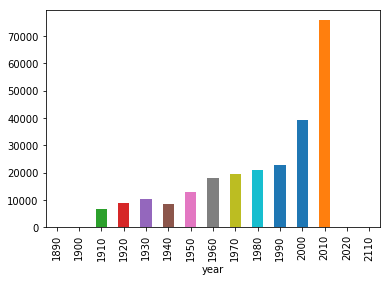

In [17]:
t=titles
t.year=t.year//10*10
t.groupby('year').size().plot('bar')

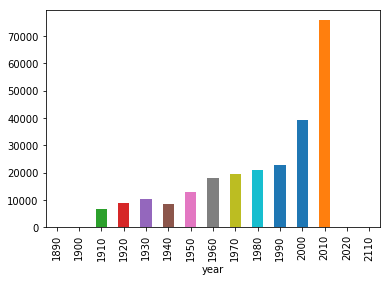

In [24]:
t=titles
t.groupby(t.year//10*10).size().plot('bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

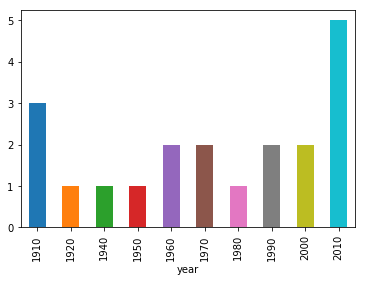

In [21]:
t_h=titles[titles.title=='Hamlet']
t_h.groupby(t_h.year//10*10).size().plot('bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [56]:
c=cast[cast.n==1]
c_1950=c[c.year//10==195]
c_1950.groupby(['year','type']).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [63]:
c_1950=cast[cast.year//10==195]
c=c_1950[c_1950.n<6]
c.groupby(['n','type']).size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [71]:
cast[cast.title.str.contains('Pink Panther')].groupby('title').size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [28]:
s=cast[cast.name=='Frank Oz'].groupby(['year','title']).size()
s[s>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [90]:
ser=cast[cast.name=='Frank Oz'].groupby('character').size()
ser[ser>1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64